# What is classification ?

**Classification** is a type of supervised learning where the goal is to assign **labels** (categories) to **input data**.
- The output (target) is **categorical** — e.g., `"spam"` or `"not spam"`, `"cat"` or `"dog"`, or `"disease A"`, `"disease B"`, `"healthy"`.
- It consists in learning a **function** $f(\mathbf{x}) = y$, where $\mathbf{x}$ is an input and $y \in \{1, 2, ..., K\}$ is a **class label**.

# What is logistic regression ?

Mathematically speaking, according to Wikipedia:
>In statistics, a logistic model (or logit model) is a statistical model that models the log-odds of an event as a linear combination of one or more independent variables. In regression analysis, logistic regression[1] (or logit regression) estimates the parameters of a logistic model (the coefficients in the linear or non linear combinations). In binary logistic regression there is a single binary dependent variable, coded by an indicator variable, where the two values are labeled "0" and "1", while the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling;[2] the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names.

In machine learning logistic regression is a specific type of classification model that predicts the output using a linear function of the input features and passing it to the sigmoid (or logistic) function.

More specifically, in logistic regression, given an input features vector $x=\begin{pmatrix} x_{0}=1 & x_{1} & x_{2} & ... & x_{n} \end{pmatrix}$, and a vector of weights $\theta=\begin{pmatrix} \theta_{0} & \theta_{1} & \theta_{2} & ... & \theta_{n} \end{pmatrix}$ the model predicts the output according to the following hypothesis function:


$$
h_\theta(x) = \sigma(\theta_{0}\underbrace{x_{0}}_{=1} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n})
$$

$$
h_\theta(x) = \sigma(\theta^{T}x)
$$

$\sigma$ is the symbol of the sigmoid function. This function is used because it allows us to map inputs from any range to range $(0, 1)$. 
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$
  
Let's see its plot:

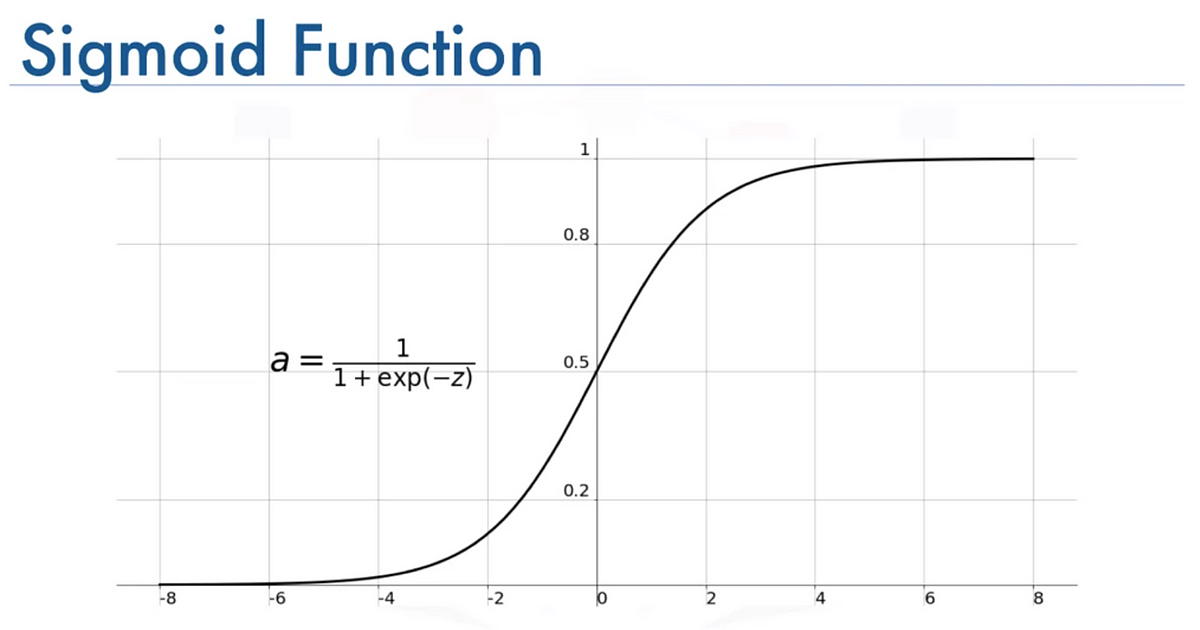


That way, the output of the function can be interpreted as a probability that the output is 1. More formally:

$$
h_\theta(x) = \sigma(\theta^{T}x) = P(\hat{y} = 1 | x, \theta)
$$

### Decision Boundary

Logistic regression predicts the output class according to a simple decision algorithm:

$$
\hat{y} = \begin{cases}
1 & \text{if } h_\theta(x) \geq 0.5 \\
0 & \text{else}
\end{cases}
$$

The decision boundary is then defined by $h_\theta(x) = 0.5$. The sigmoid function takes values bigger than 0.5 only when its input is bigger than 0. Thus the decision boundary is also defined by $\theta^{T}x \geq 0$.

### Loss function

The loss function for logistic regression is defined as follows:

$$
\mathcal{L}(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[
y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})
\right]
$$

This loss function is based on the fact that:
- If y = 1, $1-y = 0$ so we will care only about the left part of the loss. We expect the prediction to be close to 1 as well. If the predicition is close to 1, then $log(\hat{y})$ is close to 0, and thus no penalty is added. Else, the prediction is close to 0, and then $log(\hat{y})$ is very big.
- If y = 0, we will care only about the right part of the loss. We expect the prediction to be close to 0 as well. If the predicition is close to 0, then $log(1-\hat{y})$ is close to 0, and thus no penalty is added. Else, the prediction is close to 1, and then $log(1-\hat{y})$ is very big.

### Gradient

As for linear regression, to train our model we will use gradient descent. In order to do that, let's compute the gradient of the loss function.

$$
\frac{\partial \mathcal{L}}{\partial \theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y_{i})x^{(i)}_{j} 
$$

And in the vectorized form:

$$
\nabla_{\theta}\mathcal{L} = \frac{1}{m}(\hat{y}-y)^{T}x
$$


# Implementing logistic regression

To get a better understanding of logistic regression, we will use a simple dataset found on Kaggle (https://www.kaggle.com/datasets/dragonheir/logistic-regression/data). This dataset is called "Social Network Ads" and contains entries with four columns: user id, gender, age, estimated salary and purchased. It provides examples of users and if they bought the product after seeing an ad on social networks.

Let's import the dataset from kaggle.

In [1]:
# Install dependencies as needed:
%pip install kagglehub
%pip install matplotlib
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [70]:
#Import dependencies

import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
file_path = "Social_Network_Ads.csv"

ads_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dragonheir/logistic-regression",
  file_path
)

C:\Users\Arthur\AppData\Local\Temp\ipykernel_16736\4008937558.py:3: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  ads_df = kagglehub.load_dataset(


In [24]:
print(ads_df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


The column "User ID" isn't really useful for classification. This is just a random ID generated for each user and doesn't contain data that impacts the buying behavior of a user. Let's remove it from the dataframe.
Also, we would like the feature "Gender" as a binary number instead of string so that we can use it in computations.

In [25]:
ads_df = ads_df.drop('User ID', axis=1)
ads_df['Gender'] = ads_df['Gender'].map(lambda gender: 0 if gender == 'Female' else 1)
print(ads_df)

     Gender  Age  EstimatedSalary  Purchased
0         1   19            19000          0
1         1   35            20000          0
2         0   26            43000          0
3         0   27            57000          0
4         1   19            76000          0
..      ...  ...              ...        ...
395       0   46            41000          1
396       1   51            23000          1
397       0   50            20000          1
398       1   36            33000          0
399       0   49            36000          1

[400 rows x 4 columns]


### Visualizing the data

Let's plot the data. The three features we have will be the coordonates of the points. A point that represents a purchase will be represented as a cross, whereas the opposite will be represented as circles.

Text(0.5, 0.92, "Purchases of users after they've seen an ad")

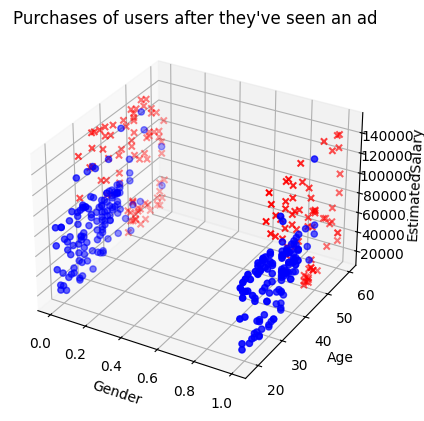

In [27]:
purchased_df = ads_df[ads_df['Purchased'] == 1]
not_purchased_df = ads_df[ads_df['Purchased'] == 0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points as crosses
ax.scatter(purchased_df['Gender'], purchased_df['Age'], purchased_df['EstimatedSalary'], marker='x', color='red')  # 'x' for cross marker
ax.scatter(not_purchased_df['Gender'], not_purchased_df['Age'], not_purchased_df['EstimatedSalary'], marker='o', color='blue')  # 'x' for cross marker

# Label axes
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('EstimatedSalary')

plt.title("Purchases of users after they've seen an ad")

### Training

In [66]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss_and_gradient(X, theta, y):
    m = X.shape[0]
    n = X.shape[1]
    print("theta", theta)
    print("x_times_theta", X @ theta)
    y_predicted = sigmoid(X @ theta)
    print("y_predicted", y_predicted)
    errors = y_predicted - y
    print("errors", errors)
    loss = - (1 / m) * (y.T @ np.log(y_predicted) + (1 - y).T @ np.log(1 - y_predicted))
    print("loss", loss)
    gradient = (1 / m) * X.T @ errors
    print("gradient", gradient)
    return loss, gradient

In [77]:
def train(X, y, learning_rate=0.1, max_epochs=10, convergence_threshold=0.1):
    X_training = X.copy()
    m = X_training.shape[0]
    X_training.insert(loc=0, column='x0', value=np.ones(m))
    n = X_training.shape[1]
    theta = np.zeros(n)
    last_loss = None
    loss_values = []
    for i in range(max_epochs):
        print("epoch", i)
        current_loss, gradient = compute_loss_and_gradient(X_training, theta, y)
        loss_values.append(current_loss)
        if(last_loss and abs(last_loss-current_loss) < convergence_threshold):
            print("Training converged!")
            break
        last_loss = current_loss
        theta = theta - learning_rate*gradient

    return theta, loss_values

In [78]:
#Create the input features matrix and add the x0 column on the left
X = ads_df.iloc[:, :-1]
print("X", X)

y = ads_df.iloc[:, -1]
print("y", y)

X      Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]
y 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [79]:
theta_optimized, loss_values = train(X, y, 0.001, 100)
print("theta_optimized", theta_optimized)

epoch 0
theta [0. 0. 0. 0.]
x_times_theta 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Length: 400, dtype: float64
y_predicted 0      0.5
1      0.5
2      0.5
3      0.5
4      0.5
      ... 
395    0.5
396    0.5
397    0.5
398    0.5
399    0.5
Length: 400, dtype: float64
errors 0      0.5
1      0.5
2      0.5
3      0.5
4      0.5
      ... 
395   -0.5
396   -0.5
397   -0.5
398    0.5
399   -0.5
Length: 400, dtype: float64
loss 0.6931471805599453
gradient x0                    0.1425
Gender                0.0800
Age                   2.2425
EstimatedSalary    4028.7500
dtype: float64
epoch 1
theta x0                -0.000143
Gender            -0.000080
Age               -0.002243
EstimatedSalary   -4.028750
dtype: float64
x_times_theta 0      -76546.292830
1      -80575.078710
2     -173236.308448
3     -229638.810690
4     -306185.042830
           ...      
395   -165178.853298
396    -92661.364590
397  

C:\Users\Arthur\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Arthur\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Arthur\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Arthur\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Arthur\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, meth

We can see that our training isn't running as expected. Our problem here is that because one of our feature (EstimatedSalary) has a way higher range of values, it makes the logit (the input of the sigmoid function) huge. Thus the output turns out to be very close to 0 no matter what and it disturbs the training.

To solve this problem, there is a well known solution and best practice called feature scaling. Let's apply it.

# Feature Scaling

Feature scaling transforms input features so they’re on similar scales. The two most common methods:

1. Standardization (Z-score normalization)

$$
x_{\text{scaled}} = \frac{x - \mu}{\sigma}
$$
- Mean-centered (mean = 0)
- Unit variance (std = 1)


2. Min-Max Scaling
$$
x_{\text{scaled}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$
- Scales values to range [0, 1] (or any custom range)



When using gradient descent, feature scaling helps because:

| Without Scaling | With Scaling |
|----------------|--------------|
| Convergence is **slow** or **diverges** | Faster and smoother convergence |
| Features dominate each other | Each feature contributes fairly |
| Learning rate tuning is harder | Learning rate behaves predictably |

Gradient descent optimizes by adjusting weights proportionally to feature values. If one feature has values in the thousands and another in decimals, their gradients differ drastically, leading to erratic updates and poor convergence.


For linear regression, we will use standardization for the following reasons:
- Preserves relationships between features.
- Less sensitive to outliers — which is important for linear models.

Now let's implement that using the sklearn library!

In [112]:
from sklearn.preprocessing import StandardScaler

X = ads_df.iloc[:, :-1] 
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print("X", X)

y = ads_df.iloc[:, -1]
print("y", y)

X        Gender       Age  EstimatedSalary
0    1.020204 -1.781797        -1.490046
1    1.020204 -0.253587        -1.460681
2   -0.980196 -1.113206        -0.785290
3   -0.980196 -1.017692        -0.374182
4    1.020204 -1.781797         0.183751
..        ...       ...              ...
395 -0.980196  0.797057        -0.844019
396  1.020204  1.274623        -1.372587
397 -0.980196  1.179110        -1.460681
398  1.020204 -0.158074        -1.078938
399 -0.980196  1.083596        -0.990844

[400 rows x 3 columns]
y 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [120]:
theta_optimized, loss_values = train(X, y, 3, 500, 0.00001)
print("theta_optimized", theta_optimized)

epoch 0
theta [0. 0. 0. 0.]
x_times_theta 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Length: 400, dtype: float64
y_predicted 0      0.5
1      0.5
2      0.5
3      0.5
4      0.5
      ... 
395    0.5
396    0.5
397    0.5
398    0.5
399    0.5
Length: 400, dtype: float64
errors 0      0.5
1      0.5
2      0.5
3      0.5
4      0.5
      ... 
395   -0.5
396   -0.5
397   -0.5
398    0.5
399   -0.5
Length: 400, dtype: float64
loss 0.6931471805599453
gradient x0                 0.142500
Gender             0.020354
Age               -0.298320
EstimatedSalary   -0.173533
dtype: float64
epoch 1
theta x0                -0.427500
Gender            -0.061062
Age                0.894959
EstimatedSalary    0.520600
dtype: float64
x_times_theta 0     -2.860150
1     -1.477177
2     -1.772742
3     -1.473239
4     -1.988771
         ...   
395   -0.093710
396   -0.063629
397   -0.072823
398   -1.192961
399    0.086295
L

### Training curve

Let's plot our training curve. This curve shows the progression of the loss as the number of iterations of training increases.

Text(0, 0.5, 'Loss')

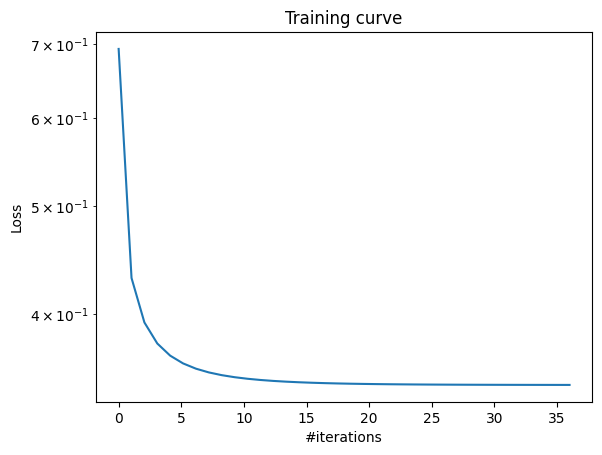

In [121]:
# Plotting the training curve
fig, ax = plt.subplots()
ax.semilogy(np.linspace(0, len(loss_values), len(loss_values)), loss_values)

ax.set_title('Training curve')
ax.set_xlabel('#iterations')
ax.set_ylabel('Loss')

# Logistic regression using scikit-learn

We just implemented a very basic logistic regression training. This was done for the sake of learning and understanding better logistic regression. Now let's do it the right way, using the scikit-learn library. 

The scikit-learn python library allows coders to use machine learning algorithms such as regression, classification, or clustering in a simple, efficient and elegant way. It provides lots of utilities to train models conveniently.

We will also separate our dataset between training and test so that we can measure how good our model is.

In [106]:
X = ads_df.iloc[:, :-1] 
y = ads_df.iloc[:, -1]

In [107]:
from sklearn.model_selection import train_test_split

# Assume X = features, y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_predicted_test = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted_test)

# As percentage:
accuracy_percent = accuracy * 100
print(f"Accuracy: {accuracy_percent:.2f}%")

Accuracy: 88.75%
